# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [256]:
DATA_FOLDER = '../HW1/Data'# Use the data folder provided in Tutorial 02 - Intro to Pandas.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average per month* of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

In [ ]:
Ebola_guina = pandas.read_csv('../HW1/Data/ebola/guinea_data/2014-08-04.csv')
Ebola_guina

In [ ]:
import glob, os    
df = pandas.concat(map(pandas.read_csv, glob.glob(os.path.join('../HW1/Data/ebola/guinea_data', "*.csv"))))
df[df.Description == 'New cases of confirmed']

## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

In [ ]:
# Write your answer here

## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [198]:
from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

In [199]:
titanic  = pd.read_excel(DATA_FOLDER+'/titanic.xls')

In [200]:
titanic[:5]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [201]:
titanic.shape

(1309, 14)

In [202]:
for col in titanic.columns:
    if titanic[col].dtype != 'object':
        print(titanic[col].describe()[['min','max']])
    else:
        print(titanic[col].describe())
    print('\t')

min    1.0
max    3.0
Name: pclass, dtype: float64
	
min    0.0
max    1.0
Name: survived, dtype: float64
	
count                     1309
unique                    1307
top       Connolly, Miss. Kate
freq                         2
Name: name, dtype: object
	
count     1309
unique       2
top       male
freq       843
Name: sex, dtype: object
	
min     0.1667
max    80.0000
Name: age, dtype: float64
	
min    0.0
max    8.0
Name: sibsp, dtype: float64
	
min    0.0
max    9.0
Name: parch, dtype: float64
	
count         1309
unique         939
top       CA. 2343
freq            11
Name: ticket, dtype: object
	
min      0.0000
max    512.3292
Name: fare, dtype: float64
	
count             295
unique            186
top       C23 C25 C27
freq                6
Name: cabin, dtype: object
	
count     1307
unique       3
top          S
freq       914
Name: embarked, dtype: object
	
count     486
unique     28
top        13
freq       39
Name: boat, dtype: object
	
min      1.0
max    328.0
Name:

In [203]:
titanic['pclass'] = titanic.pclass.astype('category')
titanic['survived'] = titanic.survived.astype('category')
titanic['sex'] = titanic.sex.astype('category')
# titanic['sibsp'] = titanic.sibsp.astype('category')
# titanic['parch'] = titanic.parch.astype('category')
titanic['pclass'] = titanic.pclass.astype('category')
# titanic['cabin'] = titanic.cabin.astype('category')
titanic['embarked'] = titanic.embarked.astype('category')
titanic['boat'] = titanic.boat.astype('category')
titanic['home.dest'] = titanic['home.dest'].astype('category')

In [204]:
titanic.embarked.head()

0    S
1    S
2    S
3    S
4    S
Name: embarked, dtype: category
Categories (3, object): [C, Q, S]

In [205]:
titanic.dtypes

pclass       category
survived     category
name           object
sex          category
age           float64
sibsp        category
parch        category
ticket         object
fare          float64
cabin          object
embarked     category
boat         category
body          float64
home.dest    category
dtype: object

In [206]:
titanic.dtypes.value_counts()

category    8
float64     3
object      3
dtype: int64

Populating the interactive namespace from numpy and matplotlib


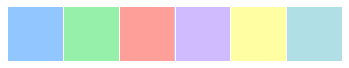

In [279]:
%pylab inline
import seaborn as sns
current_palette = sns.color_palette('pastel')
sns.set_palette(current_palette)
sns.palplot(current_palette)
sns.set_context("notebook")

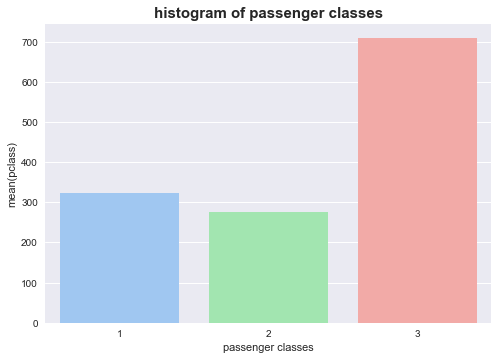

In [280]:
def att_hist(data,title):
    
    fig, ax = plt.subplots()
    ax.set_title('histogram of ' + title, fontsize=15, fontweight='bold')
    sns.barplot(data.cat.categories, data.value_counts().sort_index(), ax=ax)
    plt.xlabel(title)
#     locs, labels = plt.xticks()
#     plt.setp(labels, rotation=90)
    
att_hist(titanic.pclass, 'passenger classes')

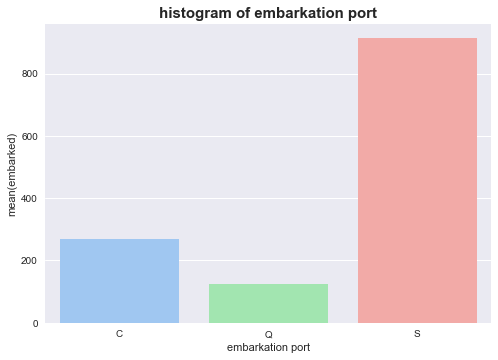

In [281]:
att_hist(titanic.embarked, 'embarkation port')

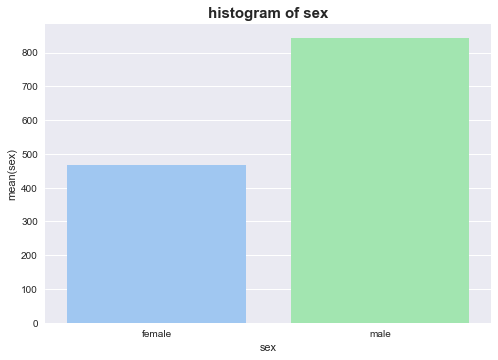

In [282]:
att_hist(titanic.sex, 'sex')

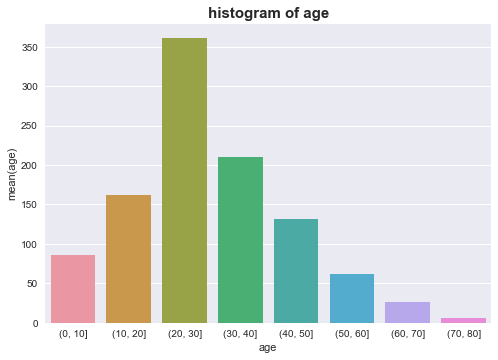

In [283]:
att_hist(pd.cut(titanic.age, [0,10,20,30,40,50,60,70,80]), 'age')

In [212]:
cabin_floor = map(lambda x: x[0] , list(titanic.cabin))

In [233]:
def get_floor(x):
    if pd.isnull(x):
        return x
    else:
        return x[0]

In [241]:
cabin_floor = list(map(get_floor , list(titanic.cabin)))

In [243]:
titanic['cabin_floor'] = cabin_floor

In [244]:
titanic.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,cabin_floor
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",B
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",C
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",C
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",C
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",C
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",E
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",D
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",A
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",C
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",NaN


In [248]:
titanic.cabin_floor = titanic.cabin_floor.astype('category')

In [249]:
titanic.cabin_floor.head()

0    B
1    C
2    C
3    C
4    C
Name: cabin_floor, dtype: category
Categories (8, object): [A, B, C, D, E, F, G, T]

In [251]:
titanic.cabin_floor.value_counts()

C    94
B    65
D    46
E    41
A    22
F    21
G     5
T     1
Name: cabin_floor, dtype: int64

In [342]:
a = titanic.cabin_floor.value_counts()

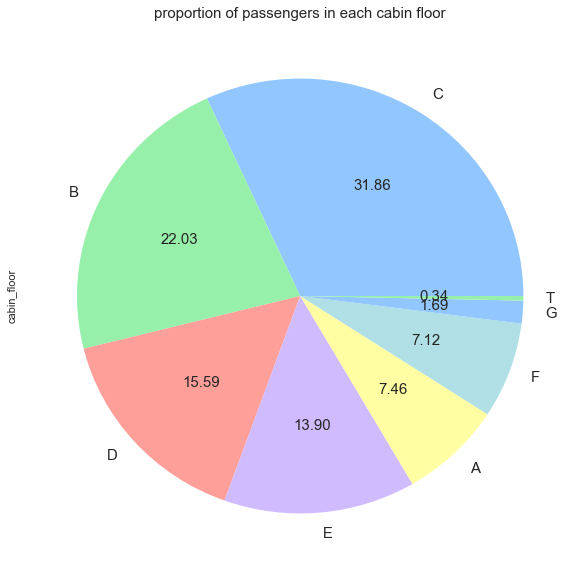

In [345]:
a.plot.pie(autopct='%.2f', figsize= (10,10), fontsize = 15)
plt.title('proportion of passengers in each cabin floor', fontsize=15)

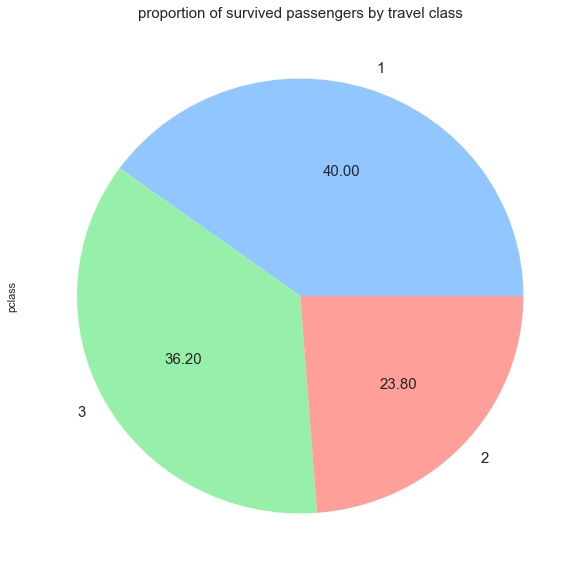

In [348]:
titanic[titanic.survived == 1].pclass.value_counts().plot.pie(autopct='%.2f', figsize= (10,10), fontsize = 15)
plt.title('proportion of survived passengers by travel class', fontsize=15)

In [399]:
titanic_survived = titanic[titanic.survived==1].set_index(['sex'])

In [400]:
titanic_survived.loc[('female')]['pclass'].head()

sex
female    1
female    1
female    1
female    1
female    1
Name: pclass, dtype: category
Categories (3, int64): [1, 2, 3]

In [412]:
male_counts = pd.get_dummies(titanic_survived.pclass).loc['male'].sum(axis=0)
fem_counts = pd.get_dummies(titanic_survived.pclass).loc['female'].sum(axis=0)

In [413]:
df = pd.DataFrame({1:[male_counts[1],fem_counts[1]],
                  2:[male_counts[2],fem_counts[2]],
                  3:[male_counts[3],fem_counts[3]]}, index=['male','female'])

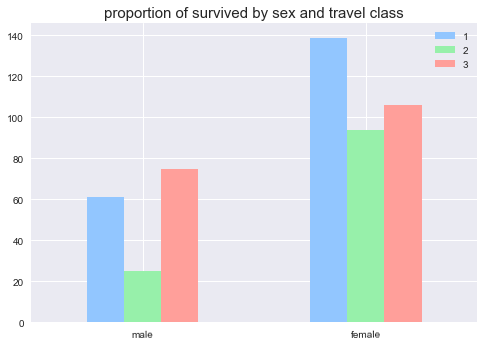

In [424]:
df.plot.bar(rot =1 , fontsize=10)
plt.title('proportion of survived by sex and travel class', fontsize=15)


In [426]:
titanic[titanic.age>28]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,cabin_floor
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",B
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",C
5,1,1,"Anderson, Mr. Harry",male,48.0,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",E
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",D
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",A
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",C
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",NaN
10,1,0,"Astor, Col. John Jacob",male,47.0,1,0,PC 17757,227.5250,C62 C64,C,NaN,124.0,"New York, NY",C
14,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,B,NaN,"Hessle, Yorks",A
17,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C,6,NaN,"Montreal, PQ",B


In [428]:
age_equal = pd.cut(titanic.age, [0,28,80])

In [429]:
titanic['age_equal'] = age_equal

In [430]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,cabin_floor,age_equal
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",B,"(28, 80]"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",C,"(0, 28]"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",C,"(0, 28]"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",C,"(28, 80]"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",C,"(0, 28]"


In [457]:
titanic_equal_age = titanic[['age_equal','sex','pclass','survived']].dropna()
# pd.get_dummies(titanic_survived.pclass)

In [449]:
titanic_equal_age.set_index(['age_equal','sex','pclass'],inplace=True)

In [450]:
titanic_equal_age.head()

survived
age_equal sex    pclass         
(28, 80]  female 1             1
(0, 28]   male   1             1
          female 1             0
(28, 80]  male   1             0
(0, 28]   female 1             0

In [451]:
titanic_equal_age.index.is_unique

False